In [81]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp

from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]

        self.delta = 0
        self.output = 0
        self.R = .1 + 0.6*random()
        self.C = c
        self.al = 0.1
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.R = self.R
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
 
        activation = 1 - (y3 -  2*y2 + y1 )/(self.R**2)
        return activation
        
    def transfer_l(self,activation):
        self.output = activation
        return self.output
    
    def transfer_derivative_l(self):
        return 1
    
    def transfer(self,activation):
        
        if  -self.al*activation > 100:
            self.output = 0
        else:
            self.output = 1.0 / (1.0 + exp(-self.al*activation)) 
        return self.output
    
    def transfer_derivative(self):
        return self.al*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*(self.weights[idx]-self.inputs[idx])/(self.R**2)

    def activation_derivate_by_weight(self, idx):
        return 2*(-self.weights[idx]+self.inputs[idx])/(self.R**2)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
        return 2*(y3 - 2*y2 +y1)  / (self.R**3) 
    
    def print_neuron_param(self):
        print(self.weights, self.R,self.C)
        
    def calculate_update(self):
        for j in range(len(self.weights)):
            self.dw[j] += ( self.delta * self.activation_derivate_by_weight(j))
        self.dR += self.delta*self.activation_derivate_by_R()
        print(self.C,self.delta, self.activation_derivate_by_R(), self.delta*self.activation_derivate_by_R())
        

    def update_weights(self, l_rate):
        #print ("update weights")
        
        dH = sqrt(sum([x**2 for x in self.dw]) + self.dR**2 )*.5
        if dH < 0.000001:
            dH = 1

        print ("update :", self.inputs)
        for j in range(len(self.weights)):
            print ("   ", self.weights[j],self.dw[j]/dH ," == > " ,self.weights[j] + l_rate * self.dw[j]/dH)
            self.weights[j] += l_rate * self.dw[j]/dH
            
        print ("   ", self.R,self.dR/dH," == > " ,self.R + l_rate * self.dR/dH)
        self.R += l_rate * self.dR/dH
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( (self.weights[0], self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,o):
        self.mode = "L"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random()
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs),  self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  + self.A) 
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return 1
    
    def print_neuron_param(self):
        print(self.weights, self.A)

    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] += l_rate * self.delta * self.activation_derivate_by_weight(j)
        self.A += l_rate * self.delta*self.activation_derivate_by_A()

    def draw_neuron(self, axes, plt):
        cl = 'black"'
        x1 = -2
        y1 = (self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (self.A - self.weights[0]*x2) / self.weights[1]
        line   = plt.Line2D([x1,x2],[y1,y2],mfc ='green')
        #print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.outputs = None
        self.HL = 0
        self.OL = 0

    def init (self, n_inputs, hidden_nmode, outputs_nmode, outputs_category):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = outputs_category
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,0,False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,False))
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(row)-1):
                neuron.inputs[i] = row[i]

        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

            outputs = []
            for neuron in self.layers[self.OL]:
                outputs.append(neuron.output)
        return outputs
     
    
    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            errors = list()
            if i != self.OL:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.layers[i + 1]:
                        error += (neuron.activation_derivate_by_input(j) * neuron.delta)
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    #exp = expected[j] if neuron["C"] == '0' else (1-expected[j])
                    expt = expected[j] 
                    errors.append(expt - neuron.output)
            for j in range(len(layer)):
                neuron = layer[j]
                neuron.delta = errors[j] * neuron.transfer_derivative()
                #print("prop error",neuron.delta, errors[j] , neuron.transfer_derivative())
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
            #print (row, voutputs)
        #print ("accuray:", dbok / len(train))
        return dbok / len(train)
    
    def calculate_update(self):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.calculate_update();
    
    def update_weights(self, l_rate):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights(l_rate);

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        self.draw_network( train)
        self.print_network_param()
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                voutputs = self.forward_propagate( row)
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                self.backward_propagate_error( expected)
                #if random() < 0.1:
                #    self.test_update_weights(l_rate,train)

                self.calculate_update()
                
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

            #if epoch % drf == 0:
            self.update_weights(l_rate)
            self.draw_network( train)
            self.print_network_param()
        sum_error = 0
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
              
            
    def draw_network (self, train):
        figure, axes = plt.subplots()
        axes.set_aspect( 1 )
        for i in range(len(self.layers[self.OL])):
            sn = self.layers[self.OL][i]
            sn.draw_neuron(axes, plt)
        for i in range(len(train)):
            cl = 'blue' if train[i][2] > 0 else 'red'
            cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
            axes.add_artist( cc)        

        plt.xlim( -1 , 2) 
        plt.ylim( -1 , 2) 
        plt.title( 'Circle' ) 
        plt.show()            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
            
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    

2


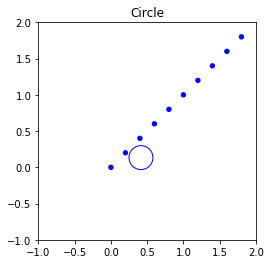

[0.0, 0.0, 1] [0.3553209798180062]
[0.2, 0.2, 1] [0.4788645975990558]
[0.4, 0.4, 1] [0.4598683082452849]
[0.6, 0.6, 1] [0.30479371461444643]
[0.8, 0.8, 1] [0.11148179911283664]
[1.0, 1.0, 1] [0.019565386290028658]
[1.2, 1.2, 1] [0.001760854076855411]
[1.4, 1.4, 1] [8.66476812299532e-05]
[1.6, 1.6, 1] [2.365844435835376e-06]
[1.8, 1.8, 1] [3.589770290606501e-08]


In [45]:
T =[]
for i in range(10):
    T.append([i*.2,i*.2,1])
n_inputs = len(T[0]) - 1
print (n_inputs)
network = SSNN_network()
network.init(n_inputs, [],['S'],[1])
network.draw_network (T)
for row in T:
    outval = network.forward_propagate(row)
    print ([round(x,3) for x in row], outval)

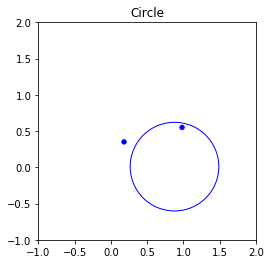

Layer ---------------
[0.8770634492919908, 0.00946654728544749] 0.6114856616602057 1
[0.981, 0.551, 1] [0.5047026238787654]
[0.181, 0.351, 1] [0.48484060858016614]
0
delta= 0.012867146054433764
w 0.8770634492919908 : -0.04790009072399947
w 0.00946654728544749 : 0.02347382009496768
R 0.6114856616602057 0.06761192785463552
delta: 0.012867146054433764 -3.722666279014844 1.8243221920123511 5.254617268554108


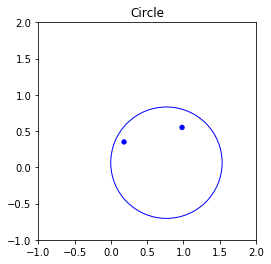

Layer ---------------
[0.7658242882503805, 0.06398018211031012] 0.7685019432011345 1


In [49]:
# gradient test

from math import sqrt
T = [[0.9810836,0.550537003,1],
     [0.1810836,0.350537003,1]
    ]
n_inputs = len(T[0]) - 1
network = SSNN_network()
network.init(n_inputs, [],['S'],[1])
network.draw_network (T)
network.print_network_param()
for row in T:
    outval = network.forward_propagate(row)
    print ([round(x,3) for x in row], outval)
neuron =network.layers[0][0] 
print (neuron.delta)
network.backward_propagate_error( [1])
print ("delta=", neuron.delta)
l_rate = 0.1
dw = []
for j in range(len(neuron.weights)):
    dw.append(neuron.delta * neuron.activation_derivate_by_weight(j))
    print ("w",neuron.weights[j], ":", dw[-1])
dR = neuron.delta*neuron.activation_derivate_by_R()
print ("R",neuron.R, dR)

print ("delta:",neuron.delta,neuron.activation_derivate_by_weight(0),neuron.activation_derivate_by_weight(1),neuron.activation_derivate_by_R())

dH = sqrt(dw[0]**2 + dw[1]**2 + dR**2 )*.5


for j in range(len(neuron.weights)):
    neuron.weights[j] += l_rate*dw[j]/dH
neuron.R += l_rate*dR/dH
network.draw_network (T)
network.print_network_param()

plt.show()



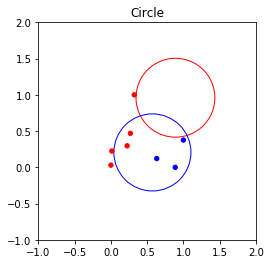

Layer ---------------
[0.889900600711181, 0.9602318110750124] 0.5439547857915155 0
[0.5723169374467637, 0.2055998744279871] 0.5316938904932829 1
0 0.013605008036482935 10.997251592080623 0.14961769628948163
1 -0.012827945570733666 1.7310751630891366 -0.022206137970956347
0 0.014201258081089815 16.288973045778054 0.23132391009900977
1 -0.01243071461428727 4.1762876233504675 -0.0519142395930497
0 0.012559527356301385 4.028660773578374 0.05059807519501589
1 -0.011531697867351061 9.231375909932291 -0.10645343789328217
0 0.014542471565098433 20.591067817827206 0.2994450182357656
1 -0.0123305611047449 4.76810591527769 -0.058793421342227176
0 0.01315722841299809 7.789834947628498 0.10249263770550317
1 -0.012761319625004857 2.153468146761738 -0.027481095323093407
0 -0.012376870178276543 4.3942212364757625 -0.05438670577848634
1 0.012341545260587826 2.8195014527836477 0.03479700479182252
0 -0.011424522192488795 9.581961588261274 -0.1094693328126661
1 0.011871805767429229 0.14338380524360572 0.0

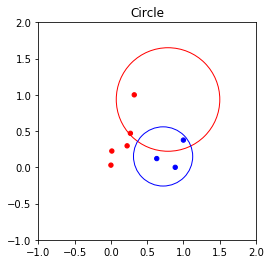

Layer ---------------
[0.7878112896040615, 0.935820389704502] 0.7141953657492481 0
[0.7197664768194808, 0.15020966537502276] 0.4084439084249577 1
0 0.012760570277347389 3.994011631630185 0.05096586611395989
1 -0.01211029446412933 7.863620067414451 -0.09523075457042553
0 0.013185169553574827 6.076394088152225 0.08011828632662678
1 -0.011118732190942894 14.849603831594443 -0.1651087681450981
0 0.012136387389724071 1.214357003198873 0.014737907020245916
1 -0.009428621975525546 25.84238480372625 -0.24365807726040076
0 0.01352454624834409 7.911014511867445 0.1069928816370725
1 -0.01100285591197426 15.629425692631271 -0.17196831888293038
0 0.012471767449957616 2.674139959805822 0.03335125170733722
1 -0.01196033472039822 8.965217273413637 -0.10722699943112299
0 -0.012682805904024267 1.968687837939306 -0.0249684857341974
1 0.012358407743053738 3.7994208813442922 0.04695479243912536
0 -0.012277623055577997 3.7799966497387163 -0.04640937401683965
1 0.011880679944928588 0.25066194805549846 0.0029

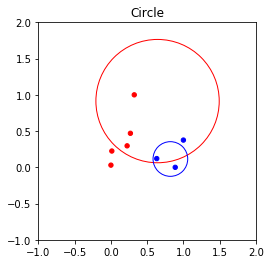

Layer ---------------
[0.6433483210680797, 0.9136990858124154] 0.8507277744875615 0
[0.8201597161965255, 0.11479772704678409] 0.2391300220741317 1
0 0.012354777612543832 1.8107859236756736 0.022371857390937718
1 -0.008253062549006889 56.938380631547034 -0.46991601679132006
0 0.01262726576146812 2.834681631891689 0.0357942783150485
1 -0.00490413859929884 97.19963751868842 -0.47668049419325564
0 0.01194953774805948 0.35983517969666784 0.004299864062865099
1 -0.002003635039984442 150.9182927758617 -0.3023851795803474
0 0.012892858987082605 3.8805448060162937 0.0500313169770239
1 -0.004744794926873537 99.43308997770285 -0.47178962088956444
0 0.01215814873397911 1.0972820874190636 0.013340918821972044
1 -0.0077148286922944405 62.887470352773974 -0.4851660606633966
0 -0.012759548428604023 1.3528616379209084 -0.017261903586252392
1 0.012954537432849465 14.697931711922763 0.19040490654756864
0 -0.01258140666260388 2.0426798884848845 -0.025699786358550674
1 0.012257243242786422 5.17436628890858

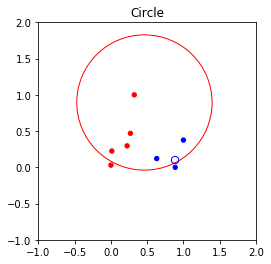

Layer ---------------
[0.4622450842306542, 0.8944410766659793] 0.933376105933049 0
[0.8849659168403972, 0.10079795268646244] 0.05043936868619536 1
>epoch=2, lrate=0.100, error=4.065


In [82]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1]
    ]
'''
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]
'''     
seed(1966)

n_inputs = len(T[0]) - 1
network = SSNN_network()
network.init(n_inputs, [],['S','S'],[0,1])
#network = set_network_1(network)
#network.print_network_param()
network.train_network( T, 0.1, 3,10)


In [37]:
x = -29
print (1/(1 + exp(-.2*x)))

0.0030184163247084215
